<a href="https://colab.research.google.com/github/SergioVillarruel/Contador-de-Monedas/blob/master/DetectorDeMonedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Autor: Sergio Villarruel Vásquez
---
##Sistema de detección y conteo de Monedas
###Por ahora solo detecta monedas de 10 centimos ,50 centimos y 1 sol


In [0]:
import numpy as np
import skimage
from skimage.exposure import histogram, cumulative_distribution, equalize_hist
from skimage.filters import threshold_otsu, threshold_local, median, hessian
from skimage.io import imread 
from skimage.color import rgb2hsv
from skimage import measure, morphology
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2

##Lectura de la imagen

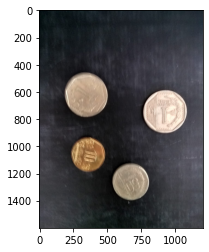

In [0]:
#im = imread('https://drive.google.com/uc?id=1TDuQ-mIYpNcH0Xp7SmurtJJwx87FK7lB') #1.60 1 1 1
#im = imread('https://drive.google.com/uc?id=1QbeB9LdTBDUayRUSfSKqCsDVCUcSFOzZ') #1.70 2 1 1
#im = imread('https://drive.google.com/uc?id=1yZwYGphXz6AqGwFNe7EKr7H8ODJTr4gj') #1.80 3 1 1 
#im = imread('https://drive.google.com/uc?id=1BYHk_Ncr4yvlfL7qCPupqWzooyx6e7fF') #1.90 4 1 1 
#im = imread('https://drive.google.com/uc?id=1LCiPGX406Vj4RRbEJucMIb0tV9KV4qqb') #2.60 1 1 2 ### 
#im = imread('https://drive.google.com/uc?id=1EjoVmuyray7mhK6duI5_znfXAdZvc6Yq') #2.70 2 1 2
#im = imread('https://drive.google.com/uc?id=1R7cH1yIezFG7Ck0YcqRfjIlJg4pVKrLg') #2.80 3 1 2
#im = imread('https://drive.google.com/uc?id=1km3gZxiOV2WgZ0TD2JN1Ez81PizZTdp3') #2.90 4 1 2 
#im = imread('https://drive.google.com/uc?id=1BBGhRxst9Ztpg10powT3N5doPIGrUDMa') #3.00 5 1 2
im = imread("260.jpeg") #Cambiar imagen a procesar
plt.imshow(im)
plt.show()

##Histograma de la imagen normalizado

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  


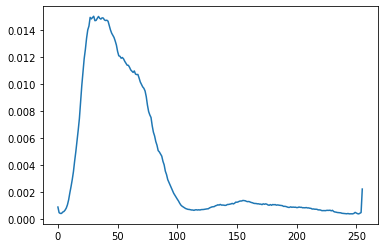

In [0]:
plt.figure()
plt.plot(histogram(im, normalize=True)[0])
plt.show()

##Encontramos el umbral adecuado

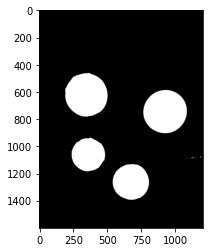

El threshold óptimo es 120


In [0]:
im1 = im[:,:,0]
th = threshold_otsu(im1)
im_th = (im1 > th)*1.0
plt.imshow(im_th,cmap='gray')
plt.show()
print("El threshold óptimo es {}".format(th))

##Trabajando con los componentes HSV

In [0]:
def rgb_to_hsv(r,g,b):
    rgb_color = np.uint8([[[r,g,b]]])
    hsv_color = cv2.cvtColor(rgb_color,cv2.COLOR_BGR2HSV)
    print (hsv_color)
rgb_to_hsv(214,211,196)

[[[ 95  21 214]]]


##Capturando las monedas de 10 centimos

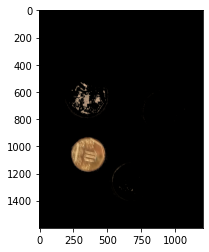

In [0]:
im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

lower_bound = np.array([85,75,0]) #Limite inferior de Matiz, Saturación y Brillo
upper_bound = np.array([110,255,255]) #Limite superior de Matiz, Saturación y Brillo

mascara = cv2.inRange(im_hsv, lower_bound, upper_bound)

im_10 = cv2.bitwise_and(im,im, mask= mascara)

plt.imshow(im_10, cmap='gray')
plt.show()

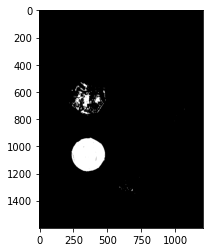

In [0]:
im_th_10 = (im_10[:,:,0] > th)*1.0
plt.imshow(im_th_10,cmap='gray')
plt.show()

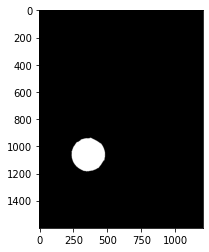

In [0]:
label_10 = measure.label(im_th_10)
im_th_10 = morphology.remove_small_objects(label_10,4000)
im_th_10 = ndimage.binary_fill_holes(im_th_10)
plt.imshow(im_th_10,cmap='gray')

##Capturando las monedas de 50 centimos y 1 sol

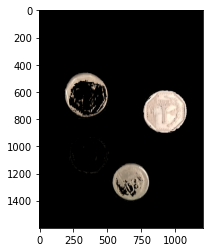

In [0]:
lower_bound = np.array([85,0,0])#Limite inferior de Matiz, Saturación y Brillo
upper_bound = np.array([110,66,255])#Limite superior de Matiz, Saturación y Brillo

mascara = cv2.inRange(im_hsv, lower_bound, upper_bound)

im_501 = cv2.bitwise_and(im,im, mask= mascara)

plt.imshow(im_501, cmap='gray')
plt.show()

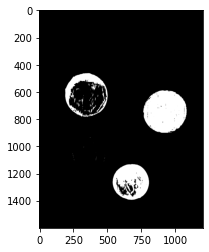

In [0]:
im_th_501 = (im_501[:,:,0] > th)*1.0
plt.imshow(im_th_501,cmap='gray')
plt.show()

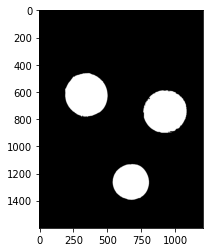

In [0]:
label_501 = measure.label(im_th_501)
im_th_501 = morphology.remove_small_objects(label_501,4000)
im_th_501 = ndimage.binary_fill_holes(im_th_501)
plt.imshow(im_th_501,cmap='gray')

##Contando las monedas

In [0]:
# n Monedas de 0.1, n Monedas de 0.5, n Monedas de 1
monedas = [0,0,0]

Contando las monedas de 10 centimos

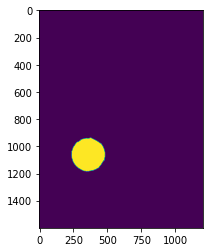

In [0]:
label_10 = measure.label(im_th_10)
n_components = label_10.max()
plt.imshow(label_10)

In [0]:
sizes = []
for i in range(n_components+1):
    sizes.append(np.sum(label_10==i))
sizes = np.array(sizes)
sizes = sizes[(sizes >= 3000) & (sizes <=100000 )]
sizes.sort()
sizes

array([46439])

In [0]:
for coin in sizes:
    monedas[0] += 1

Contando las monedas de 0.5 centimos y 1 sol

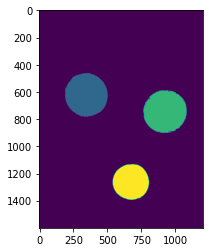

In [0]:
label_501 = measure.label(im_th_501)
n_components = label_501.max()
plt.imshow(label_501)

In [0]:
sizes = []
for i in range(n_components+1):
    sizes.append(np.sum(label_501==i))
sizes = np.array(sizes)
sizes = sizes[(sizes >= 20000) & (sizes <=100000 )]
sizes.sort()
sizes

array([54791, 77459, 77546])

In [0]:
index = 0
for coin in sizes:
    if coin < sizes[-1]-8000:
        monedas[1] += 1
    else:
        monedas[2] += 1

    index += 1

##Resultado Final

In [0]:
c10, c50, s1 = monedas[0], monedas[1], monedas[2]
monto_total = s1 * 1+ c10 * 0.1 + c50 * 0.5
print("Hay",s1,"monedas de un sol")
print("Hay",c50,"monedas de cincuenta centimos")
print("Hay",c10,"monedas de diez centimos")
print("El monto total es",monto_total)

Hay 2 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 1 monedas de diez centimos
El monto total es 2.6


##Implementación del sistema

In [0]:
def get_component_sizes(im,n):
    labels = measure.label(im)
    n_components = labels.max()
    sizes = []
    for i in range(n_components+1):
        sizes.append(np.sum(labels==i))
    sizes = np.array(sizes)
    sizes = sizes[(sizes >= n) & (sizes <=100000 )]
    sizes.sort()
    return sizes

In [0]:
def remover_residuos(im,min_size):
    objects = measure.label(im)
    im = morphology.remove_small_objects(objects,min_size)
    return im

In [0]:
def contar_monedas(im):

    im1 = im[:,:,0]
    th = threshold_otsu(im1)
    im_th = (im1 > th)*1.0

    im_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    lower_bound = np.array([85,75,60])
    upper_bound = np.array([110,255,255])


    mascara = cv2.inRange(im_hsv, lower_bound, upper_bound)
    im_10 = cv2.bitwise_and(im,im, mask= mascara)

    lower_bound = np.array([85,0,0])
    upper_bound = np.array([110,66,255])

    mascara = cv2.inRange(im_hsv, lower_bound, upper_bound)
    im_501 = cv2.bitwise_and(im,im, mask= mascara)

    im_th_501 = (im_501[:,:,0] > th)*1.0
    im_th_10 =  (im_10[:,:,0] > th)*1.0

    im_th_501 = remover_residuos(im_th_501,4000)
    im_th_501 = ndimage.binary_fill_holes(im_th_501)

    im_th_10 = remover_residuos(im_th_10,4000)
    im_th_10 = ndimage.binary_fill_holes(im_th_10)

    sizes_50 = get_component_sizes(im_th_501,20000)
    sizes_10 = get_component_sizes(im_th_10,3000)
    
    monedas = [0,0,0]

    for coin in sizes_10:
        monedas[0] += 1
    index = 0
    for coin in sizes_50:
        if coin < sizes_50[-1]-8000:
            monedas[1] += 1
        else:
            monedas[2] += 1
        index += 1
        
    c10, c50, s1 = monedas[0], monedas[1], monedas[2]
    monto_total = s1 * 1+ c10 * 0.1 + c50 * 0.5
    print("Hay",s1,"monedas de un sol")
    print("Hay",c50,"monedas de cincuenta centimos")
    print("Hay",c10,"monedas de diez centimos")
    print("El monto total es",monto_total)

#TESTING

In [0]:
im_test = imread('160.jpeg') #1.60 1 1 1
contar_monedas(im_test)
im_test = imread('170.jpeg') #1.70 2 1 1
contar_monedas(im_test)
im_test = imread('180.jpeg') #1.80 3 1 1 
contar_monedas(im_test)
im_test = imread('190.jpeg') #1.90 4 1 1 
contar_monedas(im_test)
im_test = imread('260.jpeg') #2.60 1 1 2
contar_monedas(im_test)
im_test = imread('270.jpeg') #2.70 2 1 2
contar_monedas(im_test)
im_test = imread('280.jpeg') #2.80 3 1 2 
contar_monedas(im_test)
im_test = imread('290.jpeg') #2.90 4 1 2 
contar_monedas(im_test)
im_test = imread('300.jpeg') #3.00 5 1 2
contar_monedas(im_test)

Hay 1 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 1 monedas de diez centimos
El monto total es 1.6
Hay 1 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 2 monedas de diez centimos
El monto total es 1.7
Hay 1 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 3 monedas de diez centimos
El monto total es 1.8
Hay 1 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 4 monedas de diez centimos
El monto total es 1.9
Hay 2 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 1 monedas de diez centimos
El monto total es 2.6
Hay 2 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 2 monedas de diez centimos
El monto total es 2.7
Hay 2 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 3 monedas de diez centimos
El monto total es 2.8
Hay 2 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 4 monedas de diez centimos
El monto total es 2.9
Hay 2 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 5 monedas de diez centimos
El mo

##DATASET EXTRA

In [0]:
im_test = imread('220.jpeg') #4.90 4 1 4
contar_monedas(im_test)
im_test = imread('250.jpeg') #4.90 4 1 4
contar_monedas(im_test)
im_test = imread('300_2.jpeg') #4.90 4 1 4
contar_monedas(im_test)
im_test = imread('380.jpeg') #3.80 3 1 3 ##
contar_monedas(im_test)
im_test = imread('430.jpeg') #4.90 4 1 4
contar_monedas(im_test)

Hay 2 monedas de un sol
Hay 0 monedas de cincuenta centimos
Hay 2 monedas de diez centimos
El monto total es 2.2
Hay 2 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 0 monedas de diez centimos
El monto total es 2.5
Hay 3 monedas de un sol
Hay 0 monedas de cincuenta centimos
Hay 0 monedas de diez centimos
El monto total es 3.0
Hay 3 monedas de un sol
Hay 1 monedas de cincuenta centimos
Hay 3 monedas de diez centimos
El monto total es 3.8
Hay 4 monedas de un sol
Hay 0 monedas de cincuenta centimos
Hay 3 monedas de diez centimos
El monto total es 4.3


In [0]:
 """
im = imread('https://drive.google.com/uc?id=1TDuQ-mIYpNcH0Xp7SmurtJJwx87FK7lB') #1.60 1 1 1
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1QbeB9LdTBDUayRUSfSKqCsDVCUcSFOzZ') #1.70 2 1 1
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1yZwYGphXz6AqGwFNe7EKr7H8ODJTr4gj') #1.80 3 1 1 
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1BYHk_Ncr4yvlfL7qCPupqWzooyx6e7fF') #1.90 4 1 1 ##
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1LCiPGX406Vj4RRbEJucMIb0tV9KV4qqb') #2.60 1 1 2
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1EjoVmuyray7mhK6duI5_znfXAdZvc6Yq') #2.70 2 1 2
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1R7cH1yIezFG7Ck0YcqRfjIlJg4pVKrLg') #2.80 3 1 2 ##
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1km3gZxiOV2WgZ0TD2JN1Ez81PizZTdp3') #2.90 4 1 2 
contar_monedas(im)
im = imread('https://drive.google.com/uc?id=1BBGhRxst9Ztpg10powT3N5doPIGrUDMa') #3.00 5 1 2
contar_monedas(im)
"""
print()